In [1]:
import numpy as np
import cv2

In [2]:
"""Reading image from OpenCV library"""
img = cv2.imread('FlowerN.jpg')

In [3]:
"""Convert to gray scale image using OpenCV"""
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [4]:
#cv2.imshow('Original image',img)
#cv2.imshow('Gray image', gray)

In [5]:
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [6]:
"""Transform image to black and white image with threshold of 0.6"""
(thresh, b2w) = cv2.threshold(gray, 0.6*255, 255, cv2.THRESH_BINARY)

In [7]:
#cv2.imshow('Black and White Image', b2w)


In [8]:
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [9]:
"""Reshape image to 1/4 of its original image"""
image = cv2.resize(img, None, fx = 0.5, fy =0.5)
print('New size of the reshaped image is: ', (image.shape[0], image.shape[1]))

New size of the reshaped image is:  (244, 372)


In [10]:
"""Image Histogram"""
import matplotlib.pyplot as plt
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.subplot(224)
plt.plot(hist)
plt.show()

<Figure size 640x480 with 1 Axes>

In [11]:
"""Thresholding"""

g2bw = np.zeros((gray.shape[0], gray.shape[1]))
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        if gray[i][j] <= 160:
            g2bw[i][j]=0
        else:
            g2bw[i][j]=255

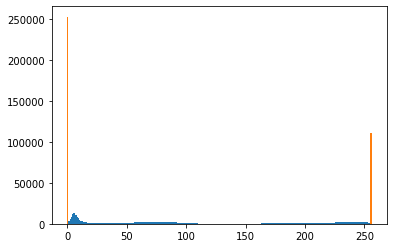

In [12]:
plt.hist(gray.ravel(),256,[0,256])
plt.hist(g2bw.ravel(),256,[0,256])
plt.show()

In [13]:
""" Show gray image and thresholded image"""
#cv2.imshow('Thresholding Image', g2bw)
#cv2.imshow('Gray Scale Image', gray)


' Show gray image and thresholded image'

In [14]:
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [15]:
"""Histogram shifting by s = 50"""
shifted_gray = gray +50
for i in range(shifted_gray.shape[0]):
    for j in range(shifted_gray.shape[1]):
        if shifted_gray[i][j]>255:
            shifted_gray[i][j]=255
        if shifted_gray[i][j]<25:
            shifted_gray[i][j]=25

In [16]:
#cv2.imshow('Shifted Image', shifted_gray)
#cv2.imshow('Gray Scale Image', gray)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

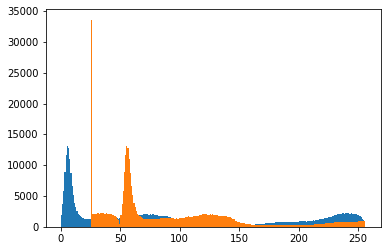

In [17]:
plt.hist(gray.ravel(),256,[0,256])
plt.hist(shifted_gray.ravel(),256,[0,256])

plt.show()

In [18]:
""" Histogram Stretching """
lambdas = 205
maximum = gray.max()
minimum = gray.min()
st_gray = (gray-minimum)/(maximum-minimum) * 205

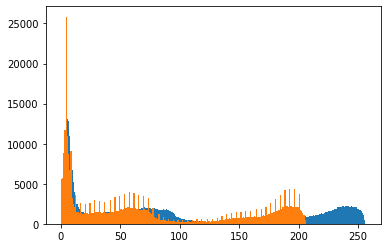

In [19]:
plt.hist(gray.ravel(),256,[0,256])
plt.hist(st_gray.ravel(),256,[0,256])

plt.show()

In [20]:
#cv2.imshow('Stretched Image', st_gray)
#cv2.imshow('Gray Scale Image', gray)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [21]:
"""Log Transformation""" 
c = 40
log_tr = c*np.log(gray+1)

C:\Users\Jack\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


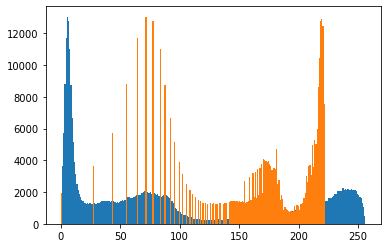

In [22]:
plt.hist(gray.ravel(),256,[0,256])
plt.hist(log_tr.ravel(),256,[0,256])

plt.show()

In [23]:
#cv2.imshow('Log-transformed image', np.float32(log_tr))
#cv2.imshow('Gray Scale Image', gray)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [24]:
"""Power-law transformation"""
gamma = 1.4
cc = 0.1
pl_tr = cc*gray**gamma
pl_tr = np.float32(pl_tr)

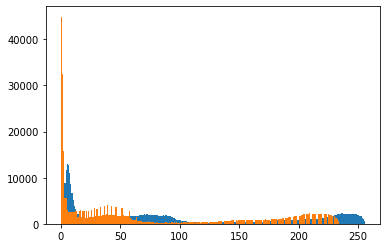

In [25]:
plt.hist(gray.ravel(),256,[0,256])
plt.hist(pl_tr.ravel(),256,[0,256])

plt.show()

In [26]:
#cv2.imshow('Power law-transformed image', pl_tr)
#cv2.imshow('Gray Scale Image', gray)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [27]:
""" These transformations are used for feature segmentation"""

' These transformations are used for feature segmentation'

In [22]:
"""Convolution"""

"""Image Blurring Convolutional mask"""
k1 = 1/256*np.array(([1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]))
""" Image sharpening Convolutional mask"""
k2=np.array(([-1,-1,-1],[-1,9,-1],[-1,-1,-1]))
"""Image embossing Convolutional mask"""
k3=np.array(([-1,-1,-1,-1,0],[-1,-1,-1,0,1],[-1,-1,0,1,1],[-1,0,1,1,1],[0,1,1,1,1]))
"""Edge detection convolutional mask"""
k4=np.array(([-1,0,0,0,0],[0,-2,0,0,0],[0,0,6,0,0],[0,0,0,-2,0],[0,0,0,0,-1]))

In [23]:
"""Convolution function"""
blurred_img = cv2.filter2D(img,-1,k1 )
sharpened_img = cv2.filter2D(img,-1,k2 )
embossed_img = cv2.filter2D(img,-1,k3)
edge_detection = cv2.filter2D(img,-1,k4)

In [24]:
cv2.imshow('Original Image', img)
cv2.imshow('blurred_img', blurred_img)
cv2.imshow('sharpend_img', sharpened_img)
cv2.imshow('embossed_img', embossed_img)
cv2.imshow('edge_detection', edge_detection)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
"""Image thresholding using Otsu's method
"""

threshold,b2w = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [31]:
"""Otsu's threshold for this image is 126.0"""
cv2.imshow('Black and White image', b2w)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
"""Image Segmentation using K-means"""
import numpy as np
import cv2


Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 5
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

cv2.imshow('res2',res2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
"""Sobel method for edge detection"""
mx= np.array(([-1,0,1],[-2,0,2],[-1,0,1]))

In [18]:
my = mx.T

In [41]:
fx= cv2.filter2D(img,-1,mx)
fy=cv2.filter2D(img,-1,my)


f = np.multiply(fx,fx)+np.multiply(fy,fy)
kf = f
threshold = 160
for i in range(f.shape[0]):
    for j in range(f.shape[1]):
        for k in range(f.shape[2]):
            if kf[i][j][k] < threshold:
                kf[i][j][k] =0



In [42]:
cv2.imshow('fx',fx)
cv2.imshow('fy',fy)
cv2.imshow('f', kf)

cv2.waitKey(0)
cv2.destroyAllWindows()